# Quantum Particle Models

This notebook aims to create several Quantum Particle Models  with different potentials and different wavefunctions. The goal is to generate the code and graphs that can analyze both the Particle in a Box model and a Simple Harmonic Osccilator Model. This project could be useful for anyone with an undergraduate education in wave mechanics who wants some technical practice.  This work is an amalgamation of several sources found online and several textbooks and shouldn't be considered original work. 

In [12]:
import numpy as np
#from numpy import polynomial
import numpy.polynomial.hermite as Herm
import scipy as sc
from scipy import constants
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
import sympy as smp
import pandas

## Particle in a Box

### Particle in a Box Wavefuntions

We begin with the Schrödinger Equation. Solving this equation for the given conditions will give us the wavefunction of our system. 
The wavefunction can be found as: $$ i\hbar\frac{\partial}{\partial t}\psi(x,t) = - \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}\psi(x,t) + V(x)\psi(x,t)$$ 
The Particle in a box model is predicated on the idea that inside of the box the potential is 0 and outside it is infinite. With this we know that our wavefunction will follow a basic form: $$ \psi(x) = A\sin{kx} $$ where A is a normalization constant. To find the normalization constant, we set the integral over all space of the square of the wavefunction to 1 and solve for A.


In [2]:
#Defining our basic wavefunction
psi, A, ksym, xsym, Lsym, nsym, Esym, msym, hsym, hbarsym = smp.symbols('psi A k x L n E m h hbar')
psi_x = A*smp.sin((nsym*smp.pi)/(Lsym)*xsym)
psi_x

A*sin(pi*n*x/L)

We now solve for our normalization constant by finding A over all space (AS) when: $$ \int_{AS} \psi^*\psi dx = 1 $$

In [3]:
#Solving for our constant A
psi_x_square = psi_x**2
NormConst = smp.solve((smp.Eq(smp.integrate(smp.simplify((A*smp.sin((nsym*smp.pi)/(Lsym)*xsym))**2), (xsym, 0, Lsym), conds = 'none'), 1)), A)[1]
NormConst

sqrt(2)*sqrt(pi)*sqrt(n/(L*(pi*n - sin(2*pi*n)/2)))

This Normalization constant from above simplifies to:$$ \sqrt{\frac{2}{L}}$$ which finally gives us a wavefunction for the particle model: $$ \psi_n(x) = \sqrt{\frac{2}{L}}\sin{\frac{n\pi}{L}x} \: (n = 1,2,3,...)$$ we can now construct our basic particle in a box.

In [4]:
#Constants 
pi = np.pi 
L = 1 
n = np.arange(start = 1, stop = 6)
x = np.linspace(0,1,200)
m = 1

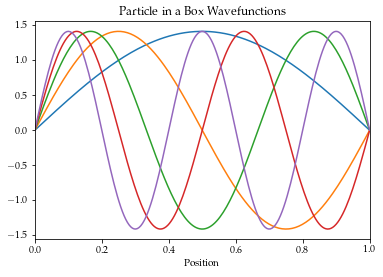

In [5]:
def PIBWF(n):  #PIB Wavefunction
    return np.sqrt(2/L)*np.sin((n*pi*x)/L)  

#Creating a Plot with the first five principle quantum numbers.  
fig = plt.subplots()
for j in range(1, max(n+1)):
    plt.plot(x,PIBWF(j))
    plt.xlim(0,1)

    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('Particle in a Box Wavefunctions')
    plt.xlabel('Position')

We can also find the probability density of the different wavefunctions. We have already briefly discussed these above, but essentially we square the wavefunction, and the resulting plot gives us the probability distribution of where the particle may be found in the model. As with most systems in Quantum Mechanics, the distributions are all normalized to 1, meaning that the integral of any one distribution will give 1. 


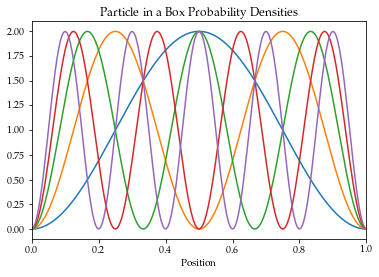

In [6]:
def PIBPD(n):  # Wavefunction Probability distribution
    return (np.sqrt(2/L)*np.sin((n*pi*x)/L))**2

fig = plt.subplots() #Plot of Probability Density Distribution for PIB
for j in range(1, max(n+1)):
    plt.plot(x,PIBPD(j))
    plt.xlim(0,1)


    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('Particle in a Box Probability Densities')
    plt.xlabel('Position')


### Energies in the Particle in a Box model

Energies in the PIB model are fairly simple. We can essentially derive the equation for energy by seeing that in this system with no potential energy, all of the energy values will be derived from kinetic energy with  1/2 mv<sup>2</sup>. The rest of the derivation will follow simply.

In [7]:
#Deriving an equation for energy
Esym = ((hbarsym**2*ksym**2)/(2*msym))
Ksym_Full = (nsym*smp.pi)/Lsym
E_Final = Esym.subs({ksym:Ksym_Full})
E_Final

pi**2*hbar**2*n**2/(2*L**2*m)

We can now look at the distribution of energy levels and the distance between levels in this model. Understanding the energy of the system is essential in Quantum Mechanics, as the wave mechanics model we are using here is fundamentally based around the Shcrödinger Equation. We can look at this by plotting the different energy values. It will become clear quite quickly that the energy distribution is a based on the square of the quantum number, but we can prove this for ourselves. 

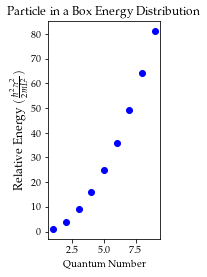

In [13]:
def PIBEnergy(n): #The exact energy of any quantum state
    Energy_Raw = (n**2*sc.constants.hbar**2*np.pi**2)/(2*m*L**2)
    return Energy_Raw

def PIBEnergy_Relative(n): #The relative energy of any quantum state (will come out to n**2)
    Energy_Relative = PIBEnergy(n)/((sc.constants.hbar**2*np.pi**2)/(2*m*L**2))
    return Energy_Relative


fig = plt.subplots(figsize = (2,4)) #Plot of Probability Energy Distribution for PIB
for j in range(1, max(n+1)):
    plt.plot(j,PIBEnergy_Relative(j), 'bo')
    #plt.xlim(0,1)


    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('Particle in a Box Energy Distribution')
    plt.xlabel('Quantum Number')
    #plt.ylabel(r'$Relative Energy \frac{1}{2}}$')
    plt.ylabel(r'Relative Energy $(\frac{\hbar^2\pi^2}{2mL^2})$', fontsize = '12')


Finally, so we can see how the PIB wavefunction changes with Energy, we will attempt to create a plot that shows these changes. 

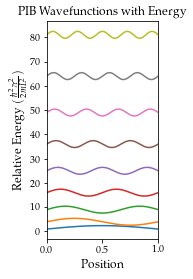

In [14]:
def PIB_EnergyWF(n): #Gives the wavefunction relative to the energy of the system
    WF0 = PIBWF(n)
    EnergyWF = WF0 + PIBEnergy_Relative(n)
    return EnergyWF

n = np.arange(start = 1, stop = 10)


fig = plt.subplots(figsize = (2, 4)) #Plot of Probability Energy Distribution for PIB
for j in range(1, max(n+1)):
    plt.plot(x,PIB_EnergyWF(j))
    plt.xlim(0,1)

    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('PIB Wavefunctions with Energy')
    plt.xlabel('Position', fontsize = '12')
    plt.ylabel(r'Relative Energy $(\frac{\hbar^2\pi^2}{2mL^2})$', fontsize = '12')


## Quantum Harmonic Osscilator 

The Quantum Harmonic Osscilator (QHO) model is another more slightly advanced quantum model. The Quantum Harmonic Osscilator is a very convinient one to work with, as many of the components of the model have some sort of parrallel to the classical harmonic osscilator. We will see this especcially when we get to the energy section. The model is much more valuable to spectroscopists as it is very commonly used in Solid State Physics. There is quite a lot that can be done with the QHO model, but here we will look at some of the simpler components we have access to, namely the stationary states of the model at different energy levels.

### QHO Wavefunction 

To start this model, we will start with the base wavefunction. Like all of wave mechanics, we derive this wavefunction from the Schrödinger equation which unlike the previous model now involves a potential energy component. We can see this change with our new Hamiltonian, which is now:
$$  \hat{H} = \frac{\hat{p}^2}{2m} +\frac{1}{2} m\omega^2 \hat{x}^2 $$
When we solve the Schrödinger equation out we find a new wavefunction that looks quite different than the our previous function. The new wavefunction is slightly more involved than the PIB model and involves Hermite Polynomials, a mathematical series we can take advantage of here. Our new wavefunction comes out to:
$$ \psi_n(x) = \frac{1}{\sqrt{2^nn!}}(\frac{m\omega}{\pi\hbar})^{\frac{1}{4}} e^{\frac{-m\omega x^2}{2\hbar}} H_n(\sqrt{\frac{m\omega}{\hbar}}x)  \: (n = 1,2,3,...)$$
We will start by defining our constants, and then creating a workable form of the Hermite polynomial to work with.

In [159]:
#Constants
dxQHO = 0.05 #Distance between points
xQHO = np.arange(-10,10,dxQHO) #Spacial Distribution
mQHO = 1 #Mass (AU)
kQHO = 1 #Spring Constant (AU)
hbar = 1 #Simplification of Hbar
omega = np.sqrt(mQHO/kQHO) #Rotational Velocity 

We will now create our stationary state function out of our Hermite Polynomial function and use it to find and plot the stationary states of QHO Model. It is also instructive to show the potential energy of the model as well, as it is essentially this term of the Hamiltonian that determines the shape of these functions. We did not show this for the PIB model as the potential function was essentially to points of infinite slope on either side of the box. 

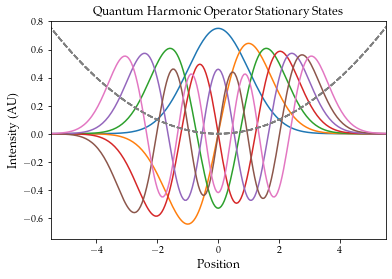

In [126]:
#Define our hermite polynomial (Thanks to https://chem.libretexts.org/Ancillary_Materials/Interactive_Applications/Jupyter_Notebooks/Quantum_Harmonic_Oscillators_-_Plotting_Eigenstates_(Python_Notebook))

def Hermite(x,n): #Hermite polynomial as a function of position and principle quantum number
    HermArgument = np.sqrt((mQHO*kQHO)/hbar)*x
    HermCoefficients = np.zeros(n+1)
    HermCoefficients[n] = 1 
    return Herm.hermval(HermArgument,HermCoefficients)  

def QHOStationary(n): #Our wavefunction, which as a QHO model can take all >= 0 
    NormQHO = 1/(np.sqrt(2**n*np.math.factorial(n)))
    MidStationary = ((mQHO*omega)/(np.pi * hbar ))**(1/4) * np.exp((-mQHO*omega*xQHO**2)/(2*hbar))
    return  NormQHO * MidStationary * Hermite(xQHO,n)

def QHO_Potential(x): #Potential Energy of the well
    return (0.5 * (mQHO*omega**2*xQHO**2)) * 0.05

#Plotting the first 7 stationary states of the QHO model
fig = plt.subplots() #Plot of Probability Energy Distribution for PIB
for j in range(0, max(nQHO+1)):
    plt.plot(xQHO,QHOStationary(j))
    plt.plot(xQHO,QHO_Potential(xQHO),'--', color = 'grey')
    plt.xlim(-5.5,5.5)
    plt.ylim(-.75,.8)

    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('Quantum Harmonic Operator Stationary States')
    plt.xlabel('Position', fontsize = '12')
    plt.ylabel('Intensity (AU)', fontsize = '12')


While the stationary states of the QHO model are interesting, their probability densities are much more interesting, as they give us a better sense of how the system behaves.

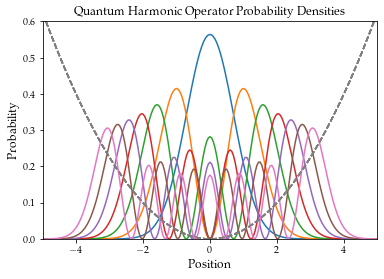

In [132]:
#Defining a function for probability density and plotting several states

def QHO_ProbDensity(n): # The probability density function for the QHO model
    return QHOStationary(n)**2

#Plotting the first ____ stationary states of the QHO model
fig = plt.subplots() #Plot of Probability Energy Distribution for PIB
for j in range(0, max(nQHO+1)):
    plt.plot(xQHO,QHO_ProbDensity(j))
    plt.plot(xQHO,QHO_Potential(xQHO),'--', color = 'grey')

    plt.xlim(-5,5)
    plt.ylim(0,.6)

    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('Quantum Harmonic Operator Probability Densities')
    plt.xlabel('Position', fontsize = '12')
    plt.ylabel('Probability', fontsize = '12')

### Energy in the QHO Model

Energy in the QHO model is actually fairly simple, and its form is derived from the classical harmonic osscilator energy equation. There is a multiplicative constant that differentiates the term from classical to quantum, but in general the forms are nearly the same. The forms follow:

$$  E_{tot} = (n + \frac{1}{2})\hbar\omega $$

There are a couple of key things we can take away from this expression. The first is that our zero point energy in this model has a principle quantum number of n = 0, not 1 like in the PIB model. The second significant point that we will go on to show is that as our energy levels are additive, all energy levels should be roughly equidistant from eachother. We can create a similar energy plot as above to show this.

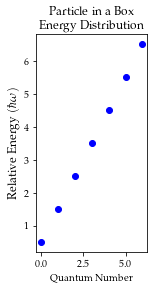

In [131]:
#Energy Plot for QHO Model

def QHO_Energy(n):  #Gives exact energy for the system
    Energy = (n + 0.5)*sc.constants.hbar*omega 
    return Energy

def QHO_RelativeEnergy(n): #Gives relative energy for the system in terms of hbar*omega
    RelEnergy = (QHO_Energy(n))/(sc.constants.hbar*omega)
    return RelEnergy

fig = plt.subplots(figsize = (2,4)) #Plot of Probability Energy Distribution for QHO
for j in range(0, max(nQHO+1)):
    plt.plot(j,QHO_RelativeEnergy(j), 'bo')
    #plt.xlim(0,1)


    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('Particle in a Box \n Energy Distribution')
    plt.xlabel('Quantum Number')
    #plt.ylabel(r'$Relative Energy \frac{1}{2}}$')
    plt.ylabel(r'Relative Energy $(\hbar\omega)$', fontsize = '12')



This result from above should not be all the surprising based off the function that we put into model it. The system represents a significant difference to the PIB model in this way. The system is invaluable for many physical models micro and macro. Understanding the energy distribution is equally as invaluable. 

We will finish this project by showing the wavefunctio at its respective energies so that we can see the energy and wavefunction evolve over increases in the energy level. We will also show the probability densities over the same interval as they are also useful in understanding the system as a whole. 

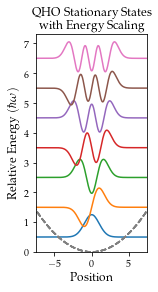

In [160]:
#Showing the Energy Dependence of the QHO Wavefunction

def QHO_EnergyWF(n): #QHO Wavefunction with energy scaling
    Wf0 = QHOStationary(n)
    WFEnergy = Wf0 + QHO_RelativeEnergy(n)
    return WFEnergy

def QHO_EnergyPD(n): #QHO Probability Densities with energy scaling
    PD0 = QHO_ProbDensity(n)
    PDEnergy = PD0 + QHO_RelativeEnergy(n)
    return PDEnergy
#omega = 2

fig = plt.subplots(figsize = (2, 4)) #Plot of Probability Energy Distribution for QHO Stationary States
for j in range(0, max(nQHO+1)):
    plt.plot(xQHO,QHO_EnergyWF(j))
    plt.plot(xQHO,QHO_Potential(xQHO),'--', color = 'grey')
    plt.xlim(-7.5,7.5)
    plt.ylim(0,7.3)
    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('QHO Stationary States \n with Energy Scaling')
    plt.xlabel('Position', fontsize = '12')
    plt.ylabel(r'Relative Energy $(\hbar\omega)$', fontsize = '12')

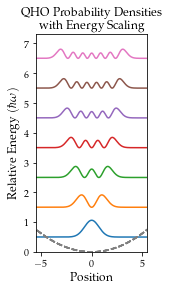

In [162]:
#Plot of Probability Energy Distribution for QHO
fig = plt.subplots(figsize = (2, 4)) #Plot of Probability Energy Distribution for QHO Probability Density
for j in range(0, max(nQHO+1)):
    plt.plot(xQHO,QHO_EnergyPD(j))
    plt.plot(xQHO,QHO_Potential(xQHO),'--', color = 'grey')
    plt.xlim(-5.5,5.5)
    plt.ylim(0,7.3)

    matplotlib.rcParams['font.serif'] = 'Palatino'
    matplotlib.rcParams['font.family'] = 'serif'

    #plt.legend(loc = 'upper right')
    plt.title('QHO Probability Densities \n with Energy Scaling')
    plt.xlabel('Position', fontsize = '12')
    plt.ylabel(r'Relative Energy $(\hbar\omega)$', fontsize = '12')